In [1]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

# Q1

Here, the probability distribution for fake coin should be changed with $0.5*\beta(20,3) + 0,5*\beta(3,20)$

In [2]:
def log_odds(c_0, c_1, a1, b1, a2, b2):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake1 = 0.5*(sps.gamma(a1+b1)/(sps.gamma(a1)*sps.gamma(b1)))*((sps.gamma(c_0+a1)*sps.gamma(c_1+b1))/sps.gamma(c_0+c_1+a1+b1))
    M_fake2 = 0.5*(sps.gamma(a2+b2)/(sps.gamma(a2)*sps.gamma(b2)))*((sps.gamma(c_0+a2)*sps.gamma(c_1+b2))/sps.gamma(c_0+c_1+a2+b2))
    M_fake = np.log(M_fake1 + M_fake2)
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
a1 = 20
b1 = 3
a2 = 3
b2 = 20


print('log_odds = ', log_odds(c_0, c_1, a1, b1, a2, b2) )

('log_odds = ', -1.1364122558339171)


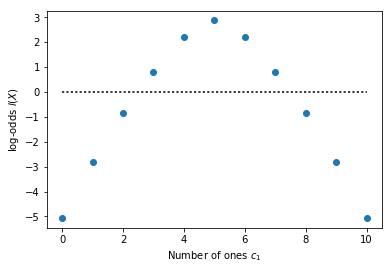

In [3]:
a1 = 20
b1 = 3
a2 = 3
b2 = 20
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

The graph above illustrates the likelihood of a coin being fair or fake depending on the outcome of 10 toin cosses. If $c_1$ is observed between 3 to 7 times out of 10 tosses, the coin is more likely to be fair. Otherwise, it is more likely that the coin is fake.

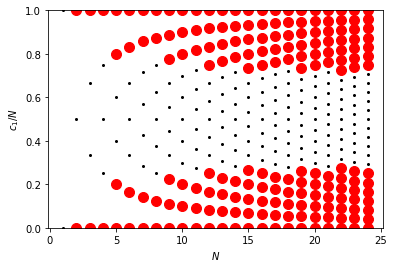

In [4]:
a1 = 20
b1 = 3
a2 = 3
b2 = 20

for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/float(N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

The graph above illustrates the possible outcomes of 1 to 25 coin tosses and likelihoods of the coin being fair or fake depending on these outcomes. The red outcomes indicate that the coin is more likely to be fake, and the dots represent that it is more likely to be fair. For example, when three tosses are made, if all tosses end up with all heads or all tails, the coin is more likely to be fake. Otherwise it is more likely to be fair. 

# Q2 (Exercise Booklet, Q74)

We are asked to compute the probability $p(n|x_{1:50})$. Here is the derivation for it, and the result is used below in the coding part:

$$
p(n=i|x_{1:50})=\frac{p(n=i,x_{1:50})}{p(x_{1:50})}
\\
p(n=i,x_{1:50})=\int\limits_0^1\int\limits_0^1 p(n=i,x_{1:50},\pi_1,\pi_2)\,d\pi_1d\pi_2 \\
               =\int\limits_0^1\int\limits_0^1 p(x_{1:50}|n=i,\pi_1,\pi_2)p(n=i)p(\pi_1)p(\pi_2)\,d\pi_1d\pi_2\\
p(x_{1:50}|n=i,\pi_1,\pi_2)=\prod_{i=1}^{50} \pi_1^{x_i[i < n]} (1-\pi_1)^{(1-x_i)[i < n]} \pi_2^{x_i[i \geq n]} (1-\pi_2)^{(1-x_i)[i \geq n]} \\
=\bigg(\prod_{i=1}^{n-1} \pi_1^{x_i} (1-\pi_1)^{1-x_i}\bigg)\bigg(\prod_{i=n}^{50} \pi_2^{x_i} (1-\pi_2)^{1-x_i}\bigg) \\
p(n=i)=\frac{1}{50}\\
p(\pi_1)=p(\pi_2)=\beta(\alpha,\beta)=\bigg(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\bigg)\pi_i^{\alpha-1}(1-\pi_i)^{\beta-1}\\
\int\limits_0^1\int\limits_0^1 p(x_{1:50}|n=i,\pi_1,\pi_2)p(n=i)p(\pi_1)p(\pi_2)\,d\pi_1d\pi_2\\
=\frac{1}{50}\int\limits_0^1\int\limits_0^1\bigg(\prod_{i=1}^{n-1} \pi_1^{x_i} (1-\pi_1)^{1-x_i}\bigg)\bigg(\prod_{i=n}^{50} \pi_2^{x_i} (1-\pi_2)^{1-x_i}\bigg)\bigg(\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\bigg)^2 \pi_1^{\alpha-1}(1-\pi_1)^{\beta-1} \pi_2^{\alpha-1}(1-\pi_2)^{\beta-1} \,d\pi_1d\pi_2 \\
=\frac{1}{50}\bigg(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\bigg)^2\frac{\Gamma(\alpha_1+\alpha)\Gamma(\beta_1+\beta)}{\Gamma(\alpha_1+\beta_1+\alpha+\beta)}\frac{\Gamma(\alpha_2+\alpha)\Gamma(\beta_2+\beta)}{\Gamma(\alpha_2+\beta_2+\alpha+\beta)}\\
p(n=i|x_{1:50})=\frac{\frac{1}{50}\bigg(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\bigg)^2\frac{\Gamma(\alpha_1+\alpha)\Gamma(\beta_1+\beta)}{\Gamma(\alpha_1+\beta_1+\alpha+\beta)}\frac{\Gamma(\alpha_2+\alpha)\Gamma(\beta_2+\beta)}{\Gamma(\alpha_2+\beta_2+\alpha+\beta)}}{\sum_{n}^{}\frac{1}{50}\bigg(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\bigg)^2\frac{\Gamma(\alpha_1+\alpha)\Gamma(\beta_1+\beta)}{\Gamma(\alpha_1+\beta_1+\alpha+\beta)}\frac{\Gamma(\alpha_2+\alpha)\Gamma(\beta_2+\beta)}{\Gamma(\alpha_2+\beta_2+\alpha+\beta)}}
$$<br><br>
Here $\alpha_1$ represents the number of 1's until n, and $\beta_1$ represents the number of 0's until n. Similarly, $\alpha_2$ and $\beta_2$ represent 1's and 0's after n, respectively. Also $\alpha$ and $\beta$ are both equal to 1 as given in the question.

In [5]:
data=[0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]

In [6]:
alpha=1
beta=1
prior=(sps.gamma(alpha+beta)/(sps.gamma(alpha)*sps.gamma(beta)))**2
probs=[]
for n in range(len(data)):
    alpha1=sum(data[0:n])
    beta1=n-alpha1
    alpha2=sum(data[n:len(data)])
    beta2=len(data)-n-alpha2
    part1=sps.gamma(alpha+alpha1)*sps.gamma(beta+beta1)/sps.gamma(alpha+beta+alpha1+beta1)
    part2=sps.gamma(alpha+alpha2)*sps.gamma(beta+beta2)/sps.gamma(alpha+beta+alpha2+beta2)
    probs.append(part1*part2*prior/len(data))
probsum=sum(probs)
for i in range(len(probs)):
    probs[i]=probs[i]/probsum
print probs

[1.9455554716026005e-05, 2.6111402382034899e-05, 4.8354448855620185e-05, 1.9107806402624108e-05, 3.2370872023269081e-05, 6.3392957712235274e-05, 2.7772152902503065e-05, 5.207278669219326e-05, 0.0001091048864026906, 0.00025261977544007596, 0.00064303215566564756, 0.00022727860674389268, 0.0005721699190755344, 0.001593901917424703, 0.0049351926035816731, 0.017118949343673931, 0.0051788418182542968, 0.018701373232584959, 0.078086435602723173, 0.023859744211943198, 0.10907311639745461, 0.035467831555815642, 0.012953468916037022, 0.062608433094178961, 0.39735485537105569, 0.13754591147459613, 0.051828894178833358, 0.021034453806344708, 0.0091183839160509077, 0.0041944566013834162, 0.0020366970933712344, 0.0010395641414082343, 0.00055591665315948358, 0.00031065930617735845, 0.00018106999560051748, 0.00010993535447174279, 0.00042785651470083681, 0.00024684029694279047, 0.00014768222894013104, 0.00091193776370530877, 0.00050955280810141427, 0.00029359947514414822, 0.00017449064414251712, 0.000

From the probabilities found, we can find the most likely value for $n$. Below, it can be seen that the max probability is at the 24th index (i.e. 25th character). 

In [7]:
probs.index(max(probs))

24

The graph below illustrates the probabilities found graphically. The maximum value is at 24 as pointed out previously.  

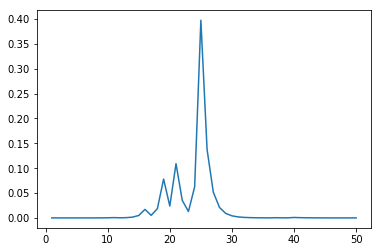

In [8]:
plt.plot(range(1,51),probs)
plt.show()